### Importing the libraries

In [34]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import os.path
from scipy import interpolate

---

Creating data stucture name params.
I think its a dictionary


In [35]:
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'xtick.direction': 'in',
         'ytick.direction': 'in'}

pylab.rcParams.update(params)


Defining the initial Fresnel-Kirchoff Equation


In [36]:
def kirschInt(xp,x,z,lamb,im=False,output=False):
    """
    Function to be integrated in the Fresnel-Kirchoff Integral
    
    """
 
    R=np.sqrt((x-xp)**2+z**2)#*(FunctSymetry(V,Theta)/V(0))#Commented out anisotropy configuration (rough)
    if im : # imaginary part of the exponential 
        return np.sin(2*np.pi/lamb*R)/R*(1+R/z)/2
    else:
        return np.cos(2*np.pi/lamb*R)/R*(1+R/z)/2

Defining the integration of the previous function


In [37]:
def kirschoff(E0,lamb,x,z,beg,end,debug=False):
    """
    Fresnel-Kirchoff Integral 
    (we do not really care about the amplitude)
    
    """
    Lr=integrate.quad(kirschInt,beg,end , args=(x,z,lamb,False,debug)) 
    return E0*-1/lamb*(Lr[0])

---


### Geometric Parameters


In [38]:
c=30
d=40
h=2*d+c*2 # total height
amp=1
nx=1000
nz=2000
# nx=int(nx/3)
# nz=int(nx/3)
E=1
lamb=12.1
#Grid definition
z=np.linspace(-3/2*h*2, 3/2*h*2,nx)
x=np.linspace(0,1000,nz)
#Dumb and inefficient way
X1, Z1 = np.meshgrid(x,z)

---

### Computation of the integrall for all the meshgrid

In [39]:
#Actual computation of the integral for each pixel
if not os.path.isfile("/In%d-%d-n-3.npy"%(nx,nz)):#If already computed...
   I=np.zeros_like(X1)
   for  (i, j),xi in np.ndenumerate(X1):
           # print(i,j)
       if i%10 ==0 and j==0:
           print(i)

       I[i,j]=kirschoff(E,lamb,Z1[i,j],xi,-c/2,c/2)
   np.save("n%d-%d-d%d.npy"%(nx,nz,d),I)
else: #Then simply load it
  
    I=np.load("n%d-%d-d%d.npy"%(nx,nz,d))


0


C:\Users\nikidis\AppData\Local\Temp\ipykernel_1932\36024362.py:11: RuntimeWarning: divide by zero encountered in scalar divide
  return np.cos(2*np.pi/lamb*R)/R*(1+R/z)/2
C:\Users\nikidis\AppData\Local\Temp\ipykernel_1932\3052345635.py:7: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  Lr=integrate.quad(kirschInt,beg,end , args=(x,z,lamb,False,debug))


10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990


In [40]:
#fig, ax = plt.subplots()

#im=ax.pcolormesh(X1,Z1,I[:,:],cmap="seismic",vmin=-0.01,vmax=0.01,rasterized=True)
#ax.set_ylabel(r'x ($\AA$)')
#ax.set_xlabel(r'z ($\AA$)')
#cbar=fig.colorbar(im)
#cbar.ax.ticklabel_format(axis='both', useOffset=False,style="sci", scilimits=(-3,3))
#cbar.set_label(r'Disp')
##plt.savefig("SingleSourceDisp%.1f.pdf"%d,dpi=400,bbox_inches='tight',transparent=True)

#fig, ax = plt.subplots()
#im=ax.pcolormesh(X1,Z1,I[:,:]**2,cmap="seismic",rasterized=True,vmax=0.0001)
#ax.set_ylabel(r'x ($\AA$)')
#ax.set_xlabel(r'z ($\AA$)')
#cbar=fig.colorbar(im)
#cbar.ax.ticklabel_format(axis='both', useOffset=False,style="sci", scilimits=(-3,3))
#cbar.set_label(r'$e_k$ norm')
#plt.savefig("SingleSourceDispInt%.1f.pdf"%d,dpi=400,bbox_inches='tight',transparent=True)

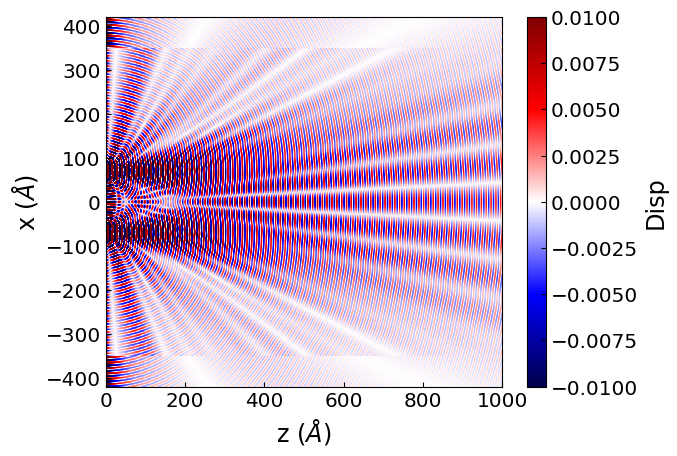

In [41]:
indShift=int(nx*(c+d)/(3*h))
L=np.zeros([indShift,nz])
I1=np.concatenate((I,L),axis=0)
I2=np.concatenate((L,I),axis=0)
I4Read=I1+I2
I4Read=I4Read[int(indShift/2):-int(indShift/2),:] # reshape the array to display it

fig, ax = plt.subplots()
im=ax.pcolormesh(X1,Z1,I4Read,cmap="seismic",vmin=-0.01,vmax=0.01,rasterized=True)
# ax.set_ylim([-250,250])
ax.set_ylabel(r'x ($\AA$)')
ax.set_xlabel(r'z ($\AA$)')
cbar=fig.colorbar(im)
cbar.ax.ticklabel_format(axis='both', useOffset=False,style="sci", scilimits=(-3,3))
cbar.set_label(r'Disp')
plt.savefig("Disp3-%.1f.pdf"%d,dpi=400,bbox_inches='tight',transparent=True)

In [42]:
#fig, ax = plt.subplots()
#im=ax.pcolormesh(X1,Z1,I4Read**2,cmap="seismic",vmax=0.00001,rasterized=True)
#ax.set_aspect('equal', adjustable='box')
#ax.set_title(r'Kirshoff Estimation')
#ax.set_ylim([-250,250])
#ax.set_ylabel(r'x ($\AA$)')
#ax.set_xlabel(r'z ($\AA$)')
#cbar=fig.colorbar(im)
#cbar.ax.ticklabel_format(axis='both', useOffset=False,style="sci", scilimits=(-3,3))
#cbar.set_label(r'Intensity')
# ax.set_ylim([-h/2,h/2])
#plt.savefig("Intensity%.1f.pdf"%d,dpi=200,bbox_inches='tight',transparent=True)

#np.savetxt("n%d-%d-d%d.csv"%(nx,nz,d),I4Read**2 )
#np.savetxt("x.csv",x )
#np.savetxt("z.csv",z )

246
446


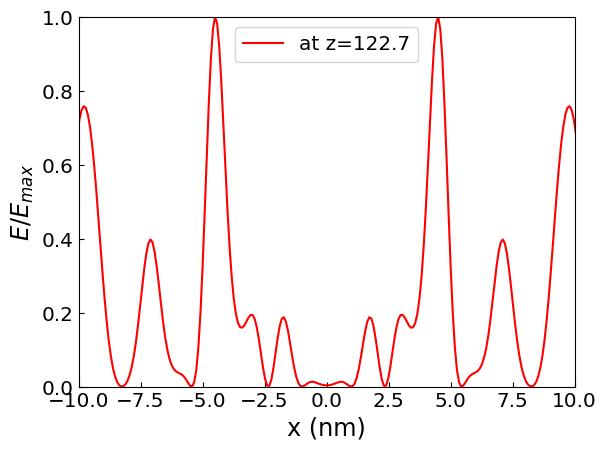

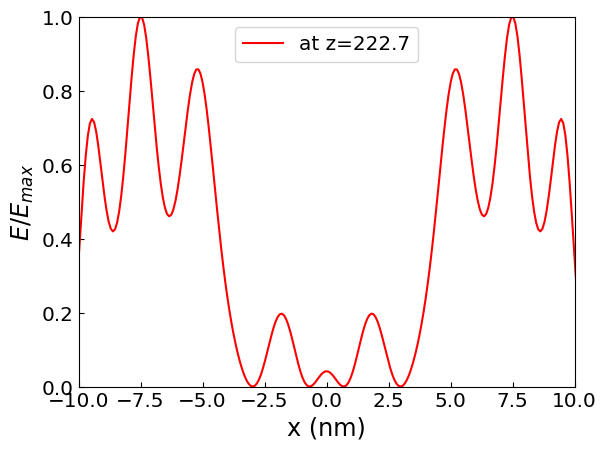

In [43]:
import pandas as pd
plot_x_val=np.arange(122.7,252.7,20)

for i in range(len(plot_x_val)):
    ind_x=np.argmax(x>plot_x_val[i])
    print(ind_x)
    fig, ax = plt.subplots()
   
        

    ax.plot(z/10,I4Read[:,ind_x]**2/np.max(I4Read[:,ind_x]**2),color="r",label="at z=%.1f"%plot_x_val[i])
    ax.set_ylabel(r"$E/E_{max}$")


    
    ax.legend()
    ax.set_xlim([-10,10])
    ax.set_ylim([0,1])
    ax.set_xlabel(r'x (nm)')
    plt.savefig("At%d-%.1f.pdf"%(i,d),dpi=400,bbox_inches='tight',transparent=True)
    #Adding the plots in csv files
    a=z/10
    b=I4Read[:,ind_x]**2/np.max(I4Read[:,ind_x]**2)
    df = pd.DataFrame({"Y" : a, "x" : b})
    df.to_csv("At%d-%.1f.csv"%(i,d), index=False)
